In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#parameter
Dr = 0.17
Dt = 0.2
omega = 10
v = 30
delta_t = 0.01
n_realizations = 5

#parameter for gaussian
mu = 0
sigma = np.sqrt(delta_t)

In [4]:
#Euler scheme
def euler_one_traj(N_time, mu, sigma, delta_t, Dr, Dt, omega):
    #initial condition
    theta_init = 0
    x_init = 0
    y_init = 0
    theta_traj = np.array([])
    x_traj = np.array([])
    y_traj = np.array([])
    
    theta = theta_init  
    x = x_init
    y = y_init
    theta_traj = np.append(theta_traj, theta)
    x_traj = np.append(x_traj, x)
    y_traj = np.append(y_traj, y)

    for i in range(N_time-1):
        s1 = np.random.normal(mu, sigma)
        s2 = np.random.normal(mu, sigma)
        s3 = np.random.normal(mu, sigma)
        theta = theta + omega*delta_t + np.sqrt(2*Dr)*s1
        x = x + v*np.cos(theta)*delta_t + np.sqrt(2*Dt)*s2
        y = y + v*np.sin(theta)*delta_t + np.sqrt(2*Dt)*s3
        
        theta_traj = np.append(theta_traj,theta)
        x_traj = np.append(x_traj, x)
        y_traj = np.append(y_traj, y)
    return theta_traj, x_traj, y_traj


In [5]:
def traj_n_realizations(n_realizations, t_max, Dt, omega):
    t_min = 0.0
    N_time = int((t_max-t_min)/delta_t +1)
    time = np.linspace(t_min, t_max, N_time)

    traj_theta_list = []
    traj_x_list = []
    traj_y_list = []
    for n in range(n_realizations):
        theta_traj, x_traj, y_traj = euler_one_traj(N_time, mu, sigma, delta_t, Dr, Dt, omega)
        traj_theta_list.append(theta_traj)
        traj_x_list.append(x_traj)
        traj_y_list.append(y_traj)
    return traj_theta_list, traj_x_list, traj_y_list, time

In [6]:
traj_theta_list_1, traj_x_list_1, traj_y_list_1, time_1 = traj_n_realizations(n_realizations = 1, t_max = 10, Dt = 0.005, omega = 10)
traj_theta_list_2, traj_x_list_2, traj_y_list_2, time_2 = traj_n_realizations(n_realizations = 1, t_max = 10, Dt = 0.2, omega = 10)
traj_theta_list_3, traj_x_list_3, traj_y_list_3, time_3 = traj_n_realizations(n_realizations = 1, t_max = 10, Dt = 5, omega = 10)

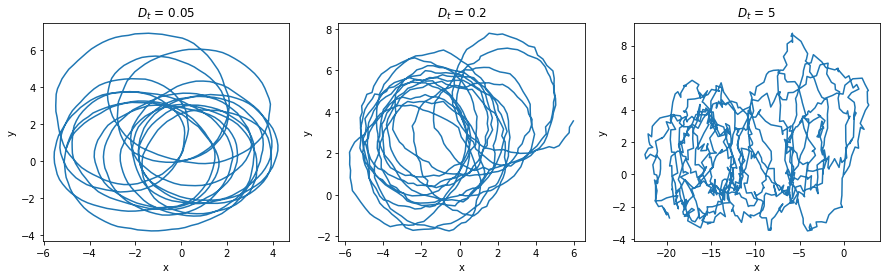

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(traj_x_list_1[0], traj_y_list_1[0])
ax[1].plot(traj_x_list_2[0], traj_y_list_2[0])
ax[2].plot(traj_x_list_3[0], traj_y_list_3[0])
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')
ax[2].set_ylabel('y')
ax[0].set_title('$D_t$ = 0.05')
ax[1].set_title('$D_t$ = 0.2')
ax[2].set_title('$D_t$ = 5')
plt.tight_layout
plt.savefig('noise.png', dpi=300)
plt.show()

end

In [ ]:
f = open("prob1d_trajx_trajy_dt=005.dat", "a")
g = open("prob1d_trajx_trajy_dt=02.dat", "a")
h = open("prob1d_trajx_trajy_dt=5.dat", "a")
for i in range(len(traj_x_list)):
    print(traj_x_list[i],traj_y_list[i],file=f)
for j in range(len(traj_x_list)):
    print(traj_x_list[j],traj_y_list[j],file=g)
for k in range(len(traj_x_list)):
    print(traj_x_list[k],traj_y_list[k],file=h)
f.close()
g.close()
h.close()